In [12]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# check to make sure we have data for 1/13/20#
cwd = os.getcwd()
print(cwd)
data_dir = os.path.join(os.path.dirname(cwd),'PFA_retrospective')
sorted(os.listdir(data_dir))


/Users/ntaverna/Documents/PFA_retrospective


['.DS_Store',
 '.ipynb_checkpoints',
 'Assess Exploration Gaps',
 'Copy of GeoMiningTemps.xlsx',
 'GeoMiningTemps.csv',
 'GeoMiningTemps_pivoted.csv',
 'pivotGeoMiningTemps.ipynb',
 '~$A Retrospective FY20 AOP - 10-25-19 .docx']

In [23]:
for file in os.listdir(data_dir):
    if file.startswith('Geo') & file.endswith('.csv'):
        path = os.path.join(data_dir, file)
        try:
            file_data = pd.read_csv(path)
        except Exception as ex:
            raise RuntimeError('Error parsing {}: {}'.format(file, ex))    
#         data.append(file_data.loc[file_data['APPLIES_TO_DATETIME'] == '31/12/9999 23:59'])
            
# ts_data = pd.concat(data)
file_data.set_index('HoleNo',inplace=True)
file_data


,ElevRd50,Elev_ft,Temp,Northing,Easting
HoleNo,,,,,
ES-037,5550,5526.113904,90.5252,4229474.159,446348.392
ES-037,5500,5485.186357,92.2838,4229474.159,446348.392
ES-037,5450,5443.651703,92.2838,4229474.159,446348.392
ES-037,5400,5401.482130,92.2838,4229474.159,446348.392
ES-037,5350,5358.587851,93.1622,4229474.159,446348.392
...,...,...,...,...,...
ESC-129,4900,4878.181912,117.7718,4228657.621,446190.721
ESC-129,4850,4838.716989,NaN,4228657.621,446190.721
ESC-129,4800,4799.516060,NaN,4228657.621,446190.721


In [24]:
file_data = pd.pivot_table(file_data, index='Elev_ft',
                         columns='HoleNo', values='Temp')#,


In [25]:
file_data

HoleNo,ES-037,ES-038,ES-039,ES-040,ES-041,ES-042,ES-044,ES-045,ES-046,ES-047,...,ES-153,ES-154,ES-155,ES-156,ES-157,ES-158,ES-161,ES-162,ESC-123,ESC-129
Elev_ft,,,,,,,,,,,,,,,,,,,,,
4740.970163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4745.686511,NaN,NaN,NaN,NaN,108.1040,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4789.026997,NaN,NaN,NaN,NaN,108.9824,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4789.336534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4790.718589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6042.574159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.7324,NaN,NaN,NaN,NaN,NaN,NaN
6044.946178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6057.596942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,39.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
out_path = os.path.join(data_dir, 'GeoMiningTemps_pivoted.csv')
file_data.to_csv(out_path)

In [29]:
data = []; column_headers = {}; key=0
for column in file_data:
    column_headers[key]=column; key+=1
    data.append(file_data[column])    
len(column_headers),column_headers,data


(74,
 {0: 'ES-037',
  1: 'ES-038',
  2: 'ES-039',
  3: 'ES-040',
  4: 'ES-041',
  5: 'ES-042',
  6: 'ES-044',
  7: 'ES-045',
  8: 'ES-046',
  9: 'ES-047',
  10: 'ES-048',
  11: 'ES-049',
  12: 'ES-050',
  13: 'ES-051',
  14: 'ES-053',
  15: 'ES-055',
  16: 'ES-057',
  17: 'ES-058',
  18: 'ES-059',
  19: 'ES-060',
  20: 'ES-061',
  21: 'ES-062',
  22: 'ES-063',
  23: 'ES-064',
  24: 'ES-065',
  25: 'ES-066',
  26: 'ES-067',
  27: 'ES-068',
  28: 'ES-069',
  29: 'ES-070',
  30: 'ES-071',
  31: 'ES-072',
  32: 'ES-073',
  33: 'ES-074',
  34: 'ES-075',
  35: 'ES-076',
  36: 'ES-077',
  37: 'ES-078',
  38: 'ES-079',
  39: 'ES-080',
  40: 'ES-081',
  41: 'ES-082',
  42: 'ES-083',
  43: 'ES-084',
  44: 'ES-085',
  45: 'ES-086',
  46: 'ES-087',
  47: 'ES-125',
  48: 'ES-126',
  49: 'ES-127',
  50: 'ES-128',
  51: 'ES-130',
  52: 'ES-131',
  53: 'ES-132',
  54: 'ES-133',
  55: 'ES-134',
  56: 'ES-135',
  57: 'ES-136',
  58: 'ES-147',
  59: 'ES-148',
  60: 'ES-149',
  61: 'ES-150',
  62: 'ES-151

In [30]:
file_data.plot.scatter(x='Temp',y='Elev_ft',c='HoleNo')

ValueError: invalid literal for int() with base 10: 'HoleNo'

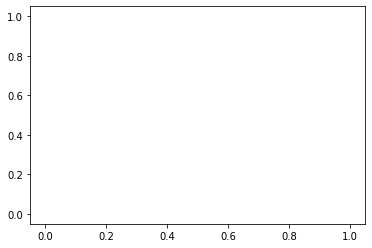

In [32]:
plt.scatter(data[1],data[0])
plt.show()